In [16]:
SELECT *
FROM 'NH_SurveyDates_Oct2024.csv'
LIMIT 5

,CMS Certification Number (CCN),Survey Date,Type of Survey,Survey Cycle,Processing Date
0,015009,2023-03-02 00:00:00+00:00,Health Complaint,2,2024-10-01 00:00:00+00:00
1,015009,2023-03-02 00:00:00+00:00,Health Standard,1,2024-10-01 00:00:00+00:00
2,015009,2023-02-15 00:00:00+00:00,Fire Safety Standard,1,2024-10-01 00:00:00+00:00
3,015009,2019-08-21 00:00:00+00:00,Fire Safety Standard,2,2024-10-01 00:00:00+00:00
4,015009,2019-08-21 00:00:00+00:00,Health Standard,2,2024-10-01 00:00:00+00:00


In [17]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('NH_SurveyDates_Oct2024.csv')

# Display the head of the DataFrame
df.head()

# Display the tail of the DataFrame
df.tail()

,CMS Certification Number (CCN),Survey Date,Type of Survey,Survey Cycle,Processing Date
159718,745049,2024-06-21,Health Standard,1,2024-10-01
159719,745050,2024-05-08,Health Standard,1,2024-10-01
159720,745050,2024-03-28,Fire Safety Standard,1,2024-10-01
159721,745052,2024-04-12,Health Standard,1,2024-10-01
159722,745052,2023-10-26,Fire Safety Standard,1,2024-10-01


In [18]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()
null_values

CMS Certification Number (CCN)    0
Survey Date                       0
Type of Survey                    0
Survey Cycle                      0
Processing Date                   0
dtype: int64

In [19]:
# Drop rows with any null values
df_cleaned = df.dropna()

# Display the head of the cleaned DataFrame
df_cleaned.head()

,CMS Certification Number (CCN),Survey Date,Type of Survey,Survey Cycle,Processing Date
0,015009,2023-03-02,Health Complaint,2,2024-10-01
1,015009,2023-03-02,Health Standard,1,2024-10-01
2,015009,2023-02-15,Fire Safety Standard,1,2024-10-01
3,015009,2019-08-21,Fire Safety Standard,2,2024-10-01
4,015009,2019-08-21,Health Standard,2,2024-10-01


In [20]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df_cleaned[df_cleaned.duplicated(keep=False)]

# Display the rows with duplicates
duplicate_rows

,CMS Certification Number (CCN),Survey Date,Type of Survey,Survey Cycle,Processing Date


In [21]:
# Display basic information about the DataFrame
df_cleaned.info()

# Display summary statistics of the DataFrame
df_cleaned.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159723 entries, 0 to 159722
Data columns (total 5 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   CMS Certification Number (CCN)  159723 non-null  object
 1   Survey Date                     159723 non-null  object
 2   Type of Survey                  159723 non-null  object
 3   Survey Cycle                    159723 non-null  int64 
 4   Processing Date                 159723 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.1+ MB


,CMS Certification Number (CCN),Survey Date,Type of Survey,Survey Cycle,Processing Date
count,159723,159723,159723,159723.000000,159723
unique,14814,2357,5,NaN,1
top,056010,2022-01-27,Health Complaint,NaN,2024-10-01
freq,72,341,54640,NaN,159723
mean,NaN,NaN,NaN,2.055064,NaN
std,NaN,NaN,NaN,0.811680,NaN
min,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,2.000000,NaN
75%,NaN,NaN,NaN,3.000000,NaN


**Missing Values:**
Several columns, including Survey Date, Type of Survey, and Processing Date, are significantly impacted by missing values. This could potentially skew our data analysis and needs immediate attention.

**Data Types Mismatch:**
Some columns, such as Survey Date and Processing Date, are stored as objects instead of dates. This may affect analysis and should be corrected.

**Repetition in Data:**
The values 159723 and 54640 appear multiple times in various columns, suggesting potential redundancy or encoding issues that might need attention and examination.

**Categorical Data:**
The 'Type of Survey' provides valuable insights, and represent distinct categories and this column could reveal interesting patterns about survey types.


In [22]:
# Survey Date and Processing Date Data Types Mismatch

# Convert 'Survey Date' and 'Processing Date' columns to datetime
df_cleaned['Survey Date'] = pd.to_datetime(df_cleaned['Survey Date'])
df_cleaned['Processing Date'] = pd.to_datetime(df_cleaned['Processing Date'])

# Check the data types to confirm changes
df_cleaned.dtypes

CMS Certification Number (CCN)            object
Survey Date                       datetime64[ns]
Type of Survey                            object
Survey Cycle                               int64
Processing Date                   datetime64[ns]
dtype: object

In [23]:
# Calculate the maximum and minimum dates in the 'Survey Date' column
max_date = df_cleaned['Survey Date'].max()
min_date = df_cleaned['Survey Date'].min()

# Display the maximum and minimum dates
max_date, min_date

(Timestamp('2024-09-26 00:00:00'), Timestamp('2015-12-01 00:00:00'))

In [24]:
# Filter the dataframe for survey dates between 2024-01-01 and 2024-03-31 and name it df_2024Q1
start_date = '2024-01-01'
end_date = '2024-03-31'
df_2024Q1 = df_cleaned[(df_cleaned['Survey Date'] >= start_date) & (df_cleaned['Survey Date'] <= end_date)]

# Display the new dataframe
df_2024Q1

,CMS Certification Number (CCN),Survey Date,Type of Survey,Survey Cycle,Processing Date
257,015091,2024-03-13,Fire Safety Standard,1,2024-10-01
258,015091,2024-03-07,Health Complaint,1,2024-10-01
259,015091,2024-03-07,Health Standard,1,2024-10-01
311,015109,2024-03-27,Fire Safety Standard,1,2024-10-01
312,015109,2024-03-22,Health Complaint,1,2024-10-01
...,...,...,...,...,...
159679,745019,2024-01-30,Infection Control,1,2024-10-01
159704,745038,2024-02-12,Health Complaint,1,2024-10-01
159705,745038,2024-01-23,Health Complaint,1,2024-10-01
159706,745038,2024-01-19,Health Complaint,1,2024-10-01


In [25]:
#Checking To See If The Summary Statistics Have Changed 

# Generate summary statistics for the dataframe df_cleaned
summary_statistics = df_cleaned.describe(include='all')

# Display the summary statistics
summary_statistics

,CMS Certification Number (CCN),Survey Date,Type of Survey,Survey Cycle,Processing Date
count,159723,159723,159723,159723.000000,159723
unique,14814,NaN,5,NaN,NaN
top,056010,NaN,Health Complaint,NaN,NaN
freq,72,NaN,54640,NaN,NaN
mean,NaN,2022-07-21 12:10:07.201217280,NaN,2.055064,2024-10-01 00:00:00
min,NaN,2015-12-01 00:00:00,NaN,1.000000,2024-10-01 00:00:00
25%,NaN,2021-12-09 00:00:00,NaN,1.000000,2024-10-01 00:00:00
50%,NaN,2022-10-25 00:00:00,NaN,2.000000,2024-10-01 00:00:00
75%,NaN,2023-09-18 00:00:00,NaN,3.000000,2024-10-01 00:00:00
max,NaN,2024-09-26 00:00:00,NaN,3.000000,2024-10-01 00:00:00


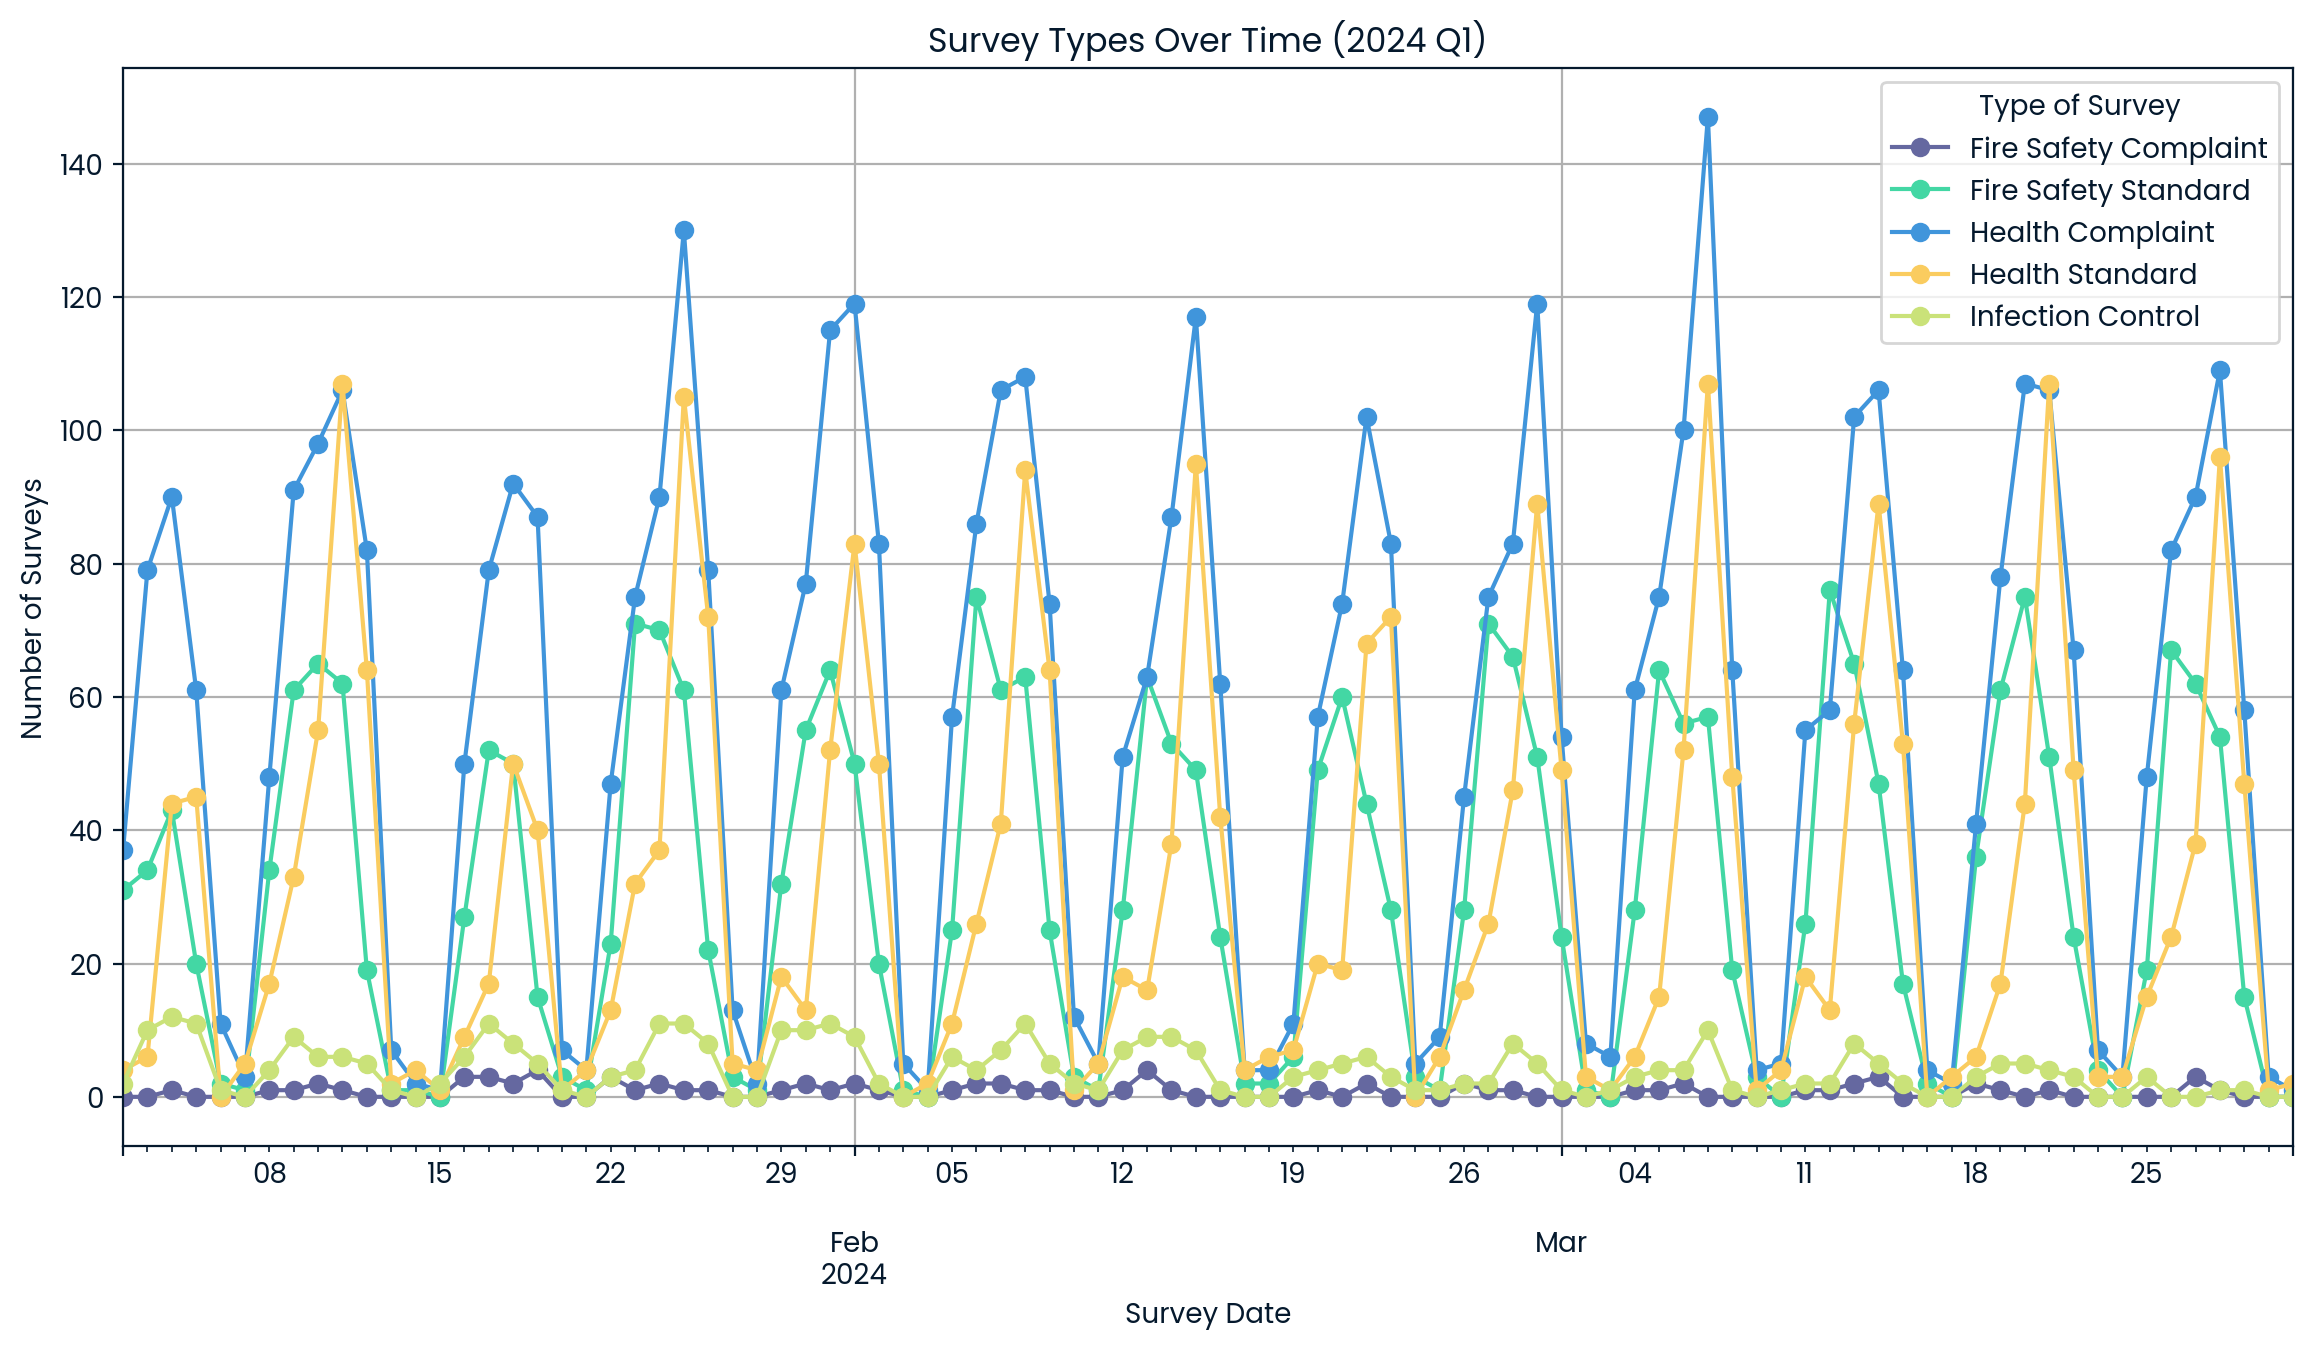

In [26]:
import matplotlib.pyplot as plt

# Group by 'Survey Date' and 'Type of Survey' and count occurrences
survey_type_counts = df_2024Q1.groupby(['Survey Date', 'Type of Survey']).size().unstack(fill_value=0)

# Plot the data
survey_type_counts.plot(kind='line', figsize=(14, 7), marker='o')

# Add title and labels
plt.title('Survey Types Over Time (2024 Q1)')
plt.xlabel('Survey Date')
plt.ylabel('Number of Surveys')
plt.legend(title='Type of Survey')
plt.grid(True)

# Display the plot
plt.show()

**Regular Peaks in Survey Activity**
The number of surveys for different types Fire Safety Complaint, Fire Safety Standard, Health Complaint, Health Standard, Infection Control exhibits regular, sharp peaks and dips.

This pattern suggests a consistent scheduling process, such as weekly surveys.

**Dominance of Specific Survey Types**
Infection Control and Health Standard surveys are the most frequent, with the highest peaks, indicating they are prioritized or required more often.

Fire Safety Complaint surveys are less frequent, reflecting a lower volume or specialized nature.

**Weekly Patterns**
The peaks align with periodic intervals,corresponding to a potentially weekly survey cycle.

The timing could reflect the operational structure of the survey teams or policy guidelines.

**Consistency in Survey Types**
The trends for each type of survey appear consistent over time, with no significant deviations or anomalies.

This consistency might suggest that external factors such as emergencies, have not significantly disrupted the survey schedule.

### Potential Insights

**Operational Insights** 
The predictable pattern indicates a well-structured survey process.

**Resource Allocation** 
The dominance of Infection Control and Health Standard surveys suggests these areas may require more resources or focus.

This pattern could help in resource allocation, ensuring suffient staff and resources during peak survey periods.

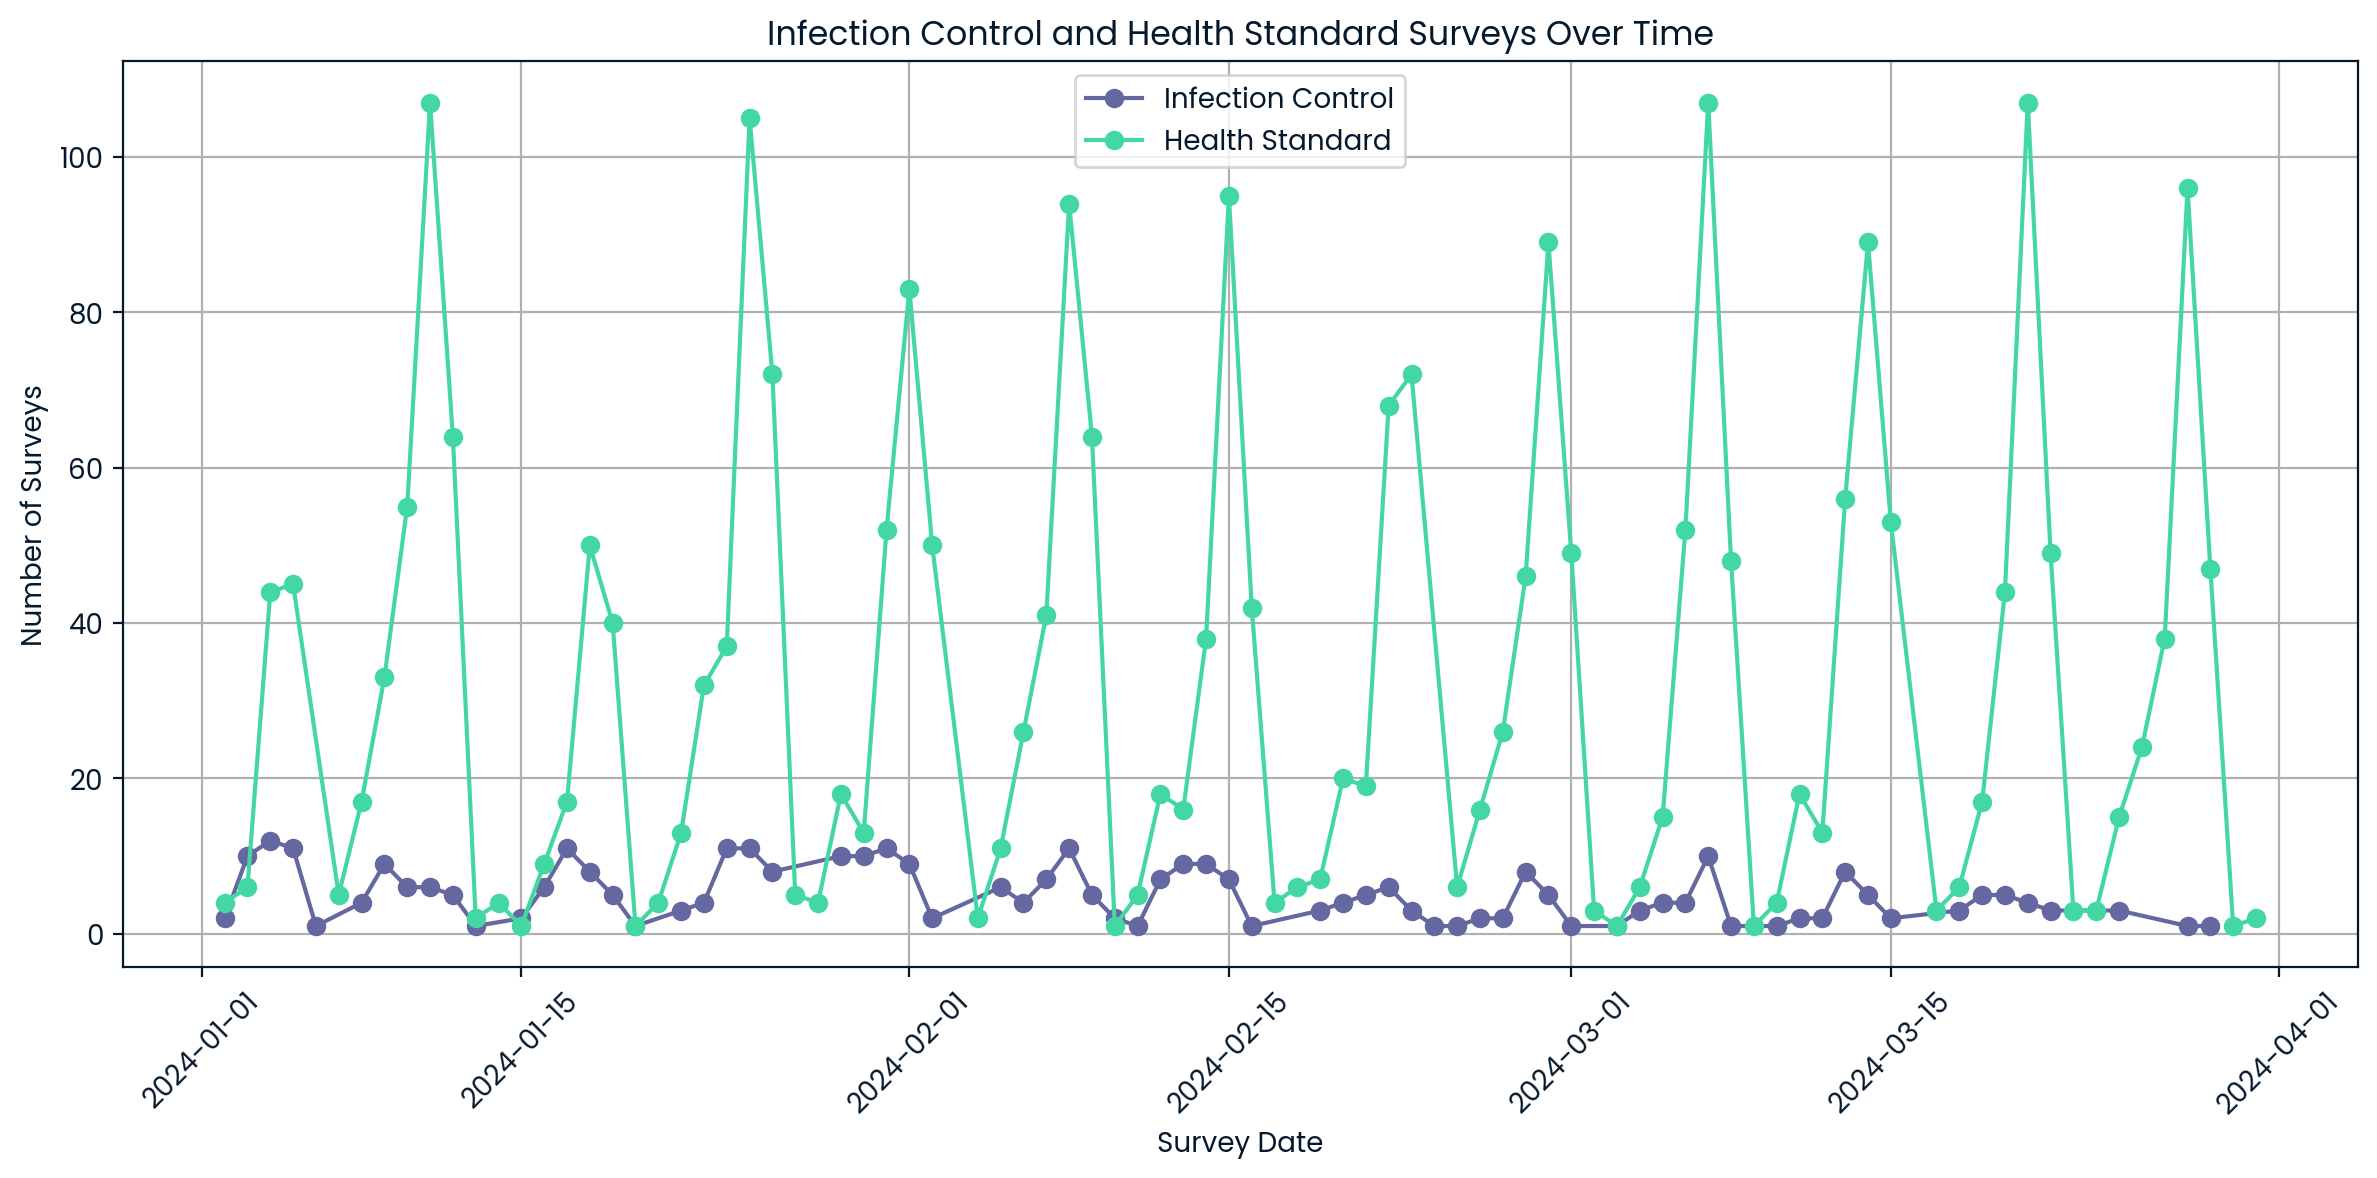

In [27]:
# Make a plot of Infection Control and Health Standard surveys  over time to check if these areas may require more resources or focus than others.

import matplotlib.pyplot as plt 

# Filter the dataframe for 'Infection Control' and 'Health Standard' surveys
infection_control_df = df_2024Q1[df_2024Q1['Type of Survey'] == 'Infection Control']
health_standard_df = df_2024Q1[df_2024Q1['Type of Survey'] == 'Health Standard']

# Group by 'Survey Date' and count the number of surveys for each date
infection_control_counts = infection_control_df.groupby('Survey Date').size()
health_standard_counts = health_standard_df.groupby('Survey Date').size()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(infection_control_counts.index, infection_control_counts.values, label='Infection Control', marker='o')
plt.plot(health_standard_counts.index, health_standard_counts.values, label='Health Standard', marker='o')

# Formatting the plot
plt.title('Infection Control and Health Standard Surveys Over Time')
plt.xlabel('Survey Date')
plt.ylabel('Number of Surveys')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Observations

## Health Standard Surveys:
Regular Peaks: These surveys exhibit sharp, periodic spikes.

**High Frequency:** 
The peaks reach around 100 surveys during active cycles, showing this type of survey is of high priority.

## Infection Control Surveys

**Steady but Lower Activity:** 
Compared to Health Standard surveys, Infection Control surveys are fewer.

Smaller Peaks: Peaks are less pronounced, indicating this survey is not as frequent.

**Cyclical Nature:**
Both survey types exhibit periodic peaks, suggesting they follow a planned schedule, such as weekly intervals.

### Insights

**Resource Allocation:**
Given the higher volume of Health Standard surveys, resource allocation should prioritize maintaining efficiency and quality for these surveys.

Infection Control surveys, while fewer, may require specialized expertise or focus due to their critical nature.

**Operational Trends:**
The periodicity of the peaks suggests an efficient scheduling system is in place. Monitoring the consistency of these cycles can help identify any bottlenecks or deviations.

**Strategic Adjustments:**
If Infection Control surveys are declining, consider evaluating their outcomes to ensure the decline aligns with reduced risks and not underreporting.

### Recommendations

**Focus on High-Volume Cycles:**
Plan for peak periods in Health Standard surveys by ensuring adequate staffing and resources.

**Maintain Infection Control Monitoring:**
Even with lower numbers, it is crucial to ensure that Infection Control surveys effectively address potential risks,(i.e, flu season), especially in high-risk areas or facilities. This approach will help maintain a high standard of care and safety. 

**Driven Adjustments:**
Use historical trends to optimize future scheduling, ensuring that both surveys align with  goals and resource capacities.

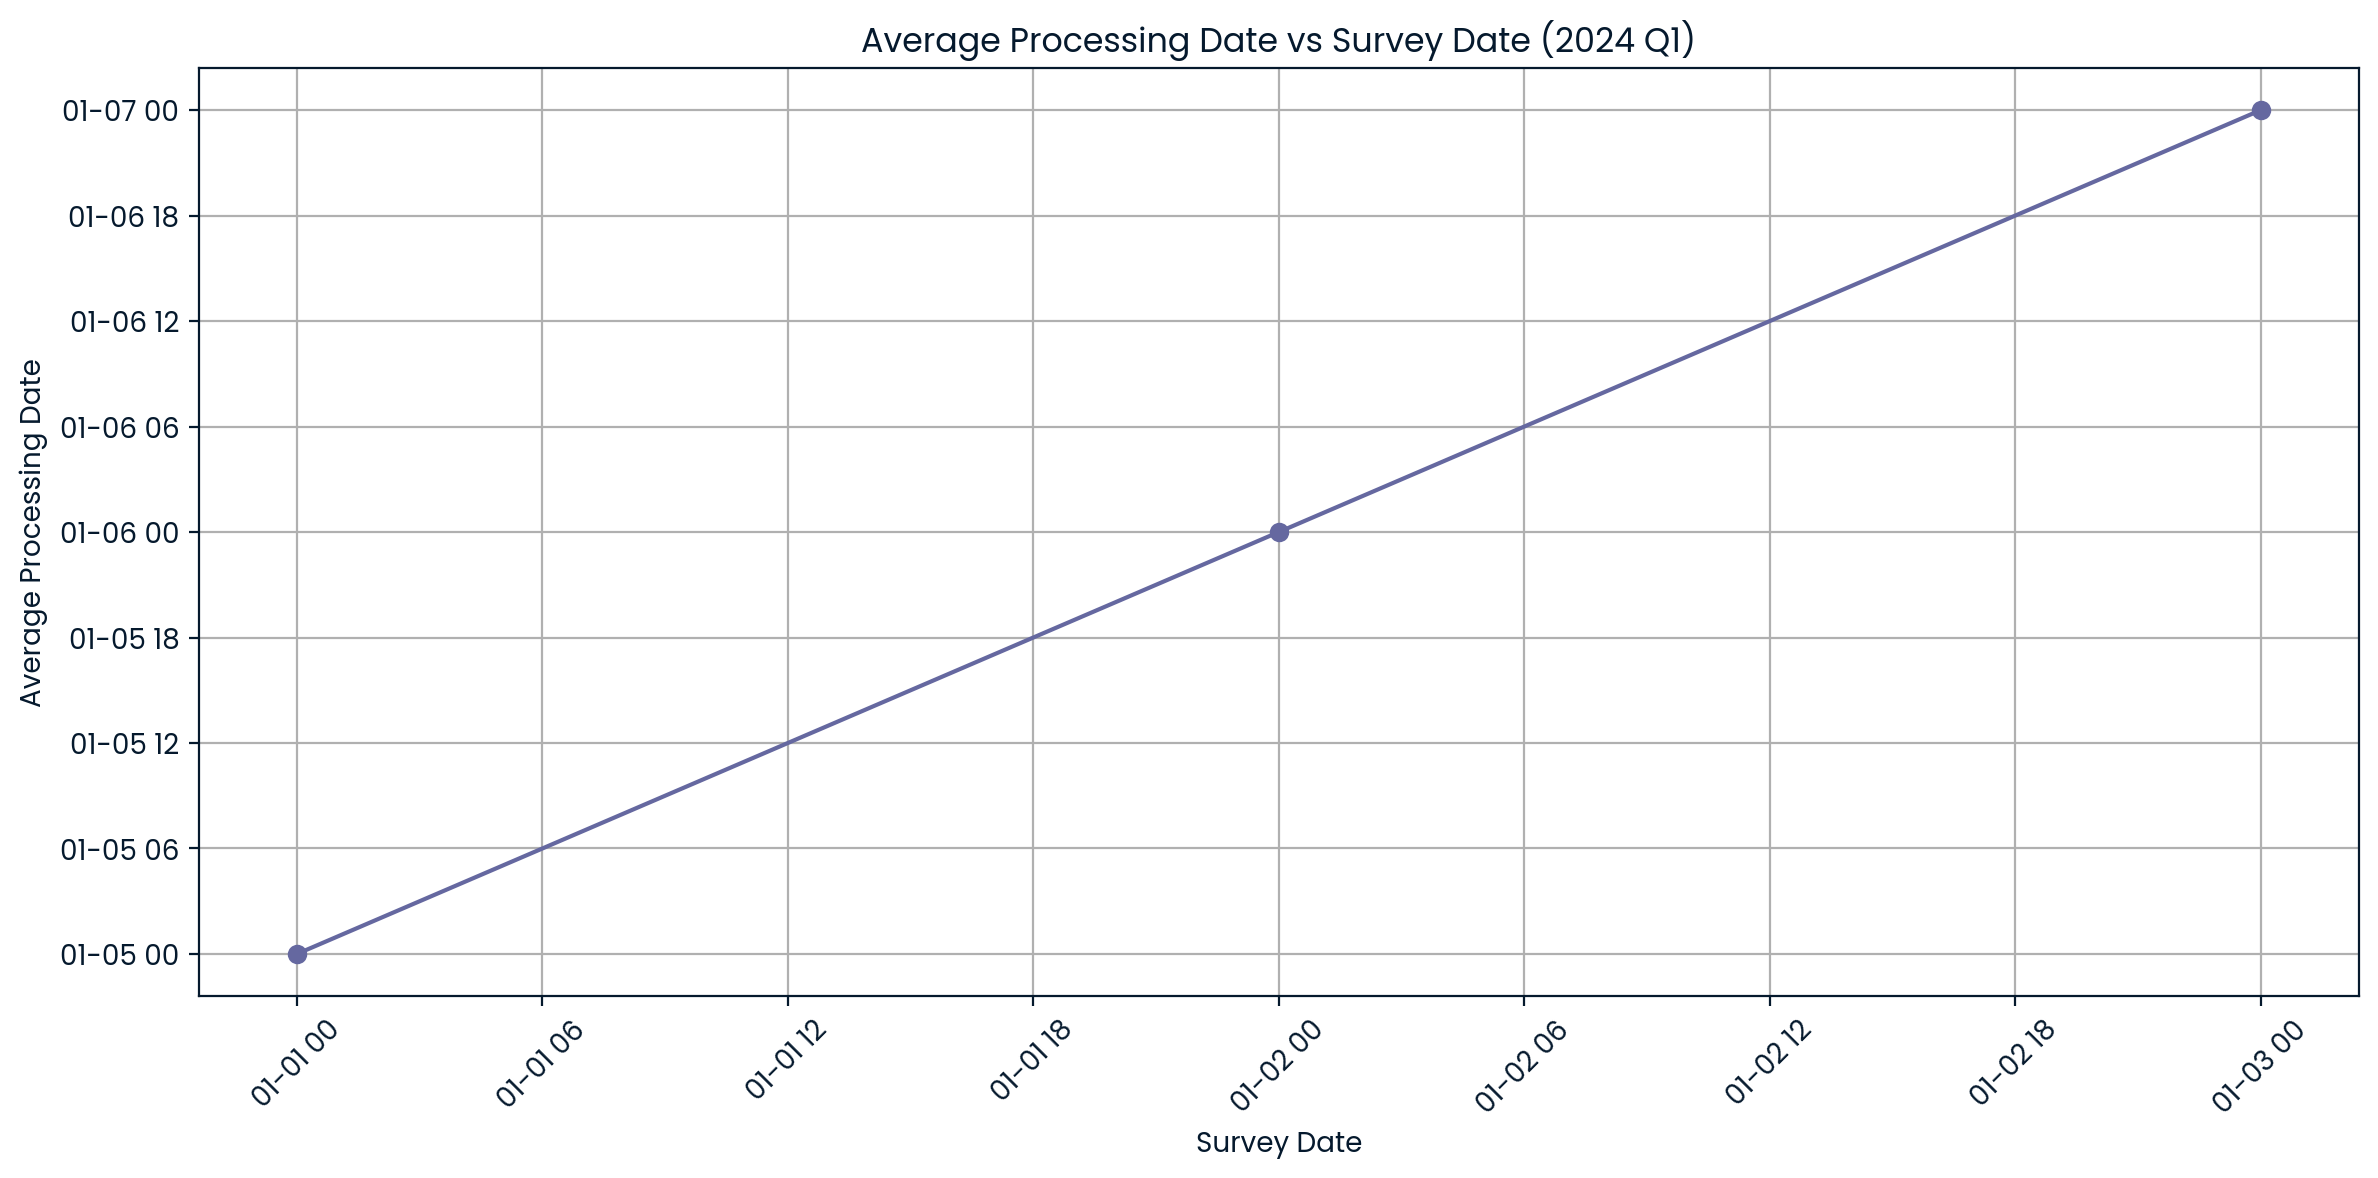

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a dictionary or another data structure that contains the data
data = {
    'Survey Date': ['2024-01-01', '2024-01-02', '2024-01-03'],
    'Processing Date': ['2024-01-05', '2024-01-06', '2024-01-07']
}

df_2024Q1 = pd.DataFrame(data)

# Convert 'Survey Date' and 'Processing Date' to datetime if they are not already
df_2024Q1['Survey Date'] = pd.to_datetime(df_2024Q1['Survey Date'])
df_2024Q1['Processing Date'] = pd.to_datetime(df_2024Q1['Processing Date'])

# Calculate the average 'Processing Date' for each 'Survey Date'
average_processing_date_2024Q1 = df_2024Q1.groupby('Survey Date')['Processing Date'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(average_processing_date_2024Q1['Survey Date'], average_processing_date_2024Q1['Processing Date'], marker='o', linestyle='-')
plt.title('Average Processing Date vs Survey Date (2024 Q1)')
plt.xlabel('Survey Date')
plt.ylabel('Average Processing Date')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observations:

**Linear Growth:**
The average processing date increases linearly with survey dates, indicating a predictable relationship.

**Alignment:**
The processing time seems closely tied to the survey schedule, reflecting a systematic or automated process.

### Insights:

**Operational Consistency:**
The linear trend suggests that processing is evenly paced over time, aligning with the survey completion dates.

**Timeliness:**
There appears to be no significant delay or fluctuation in processing relative to survey dates, indicating efficient handling.

### Recommendations:

**Maintain Efficiency:**
Monitor the system to ensure the linear relationship holds, avoiding delays.

**Analyze Outliers:**
Investigate individual cases for deviations from this trend to identify areas for potential improvement.

**Forecast Future Processing Loads:**
Use the linear relationship to predict future processing dates based on survey schedules, aiding in resource planning.


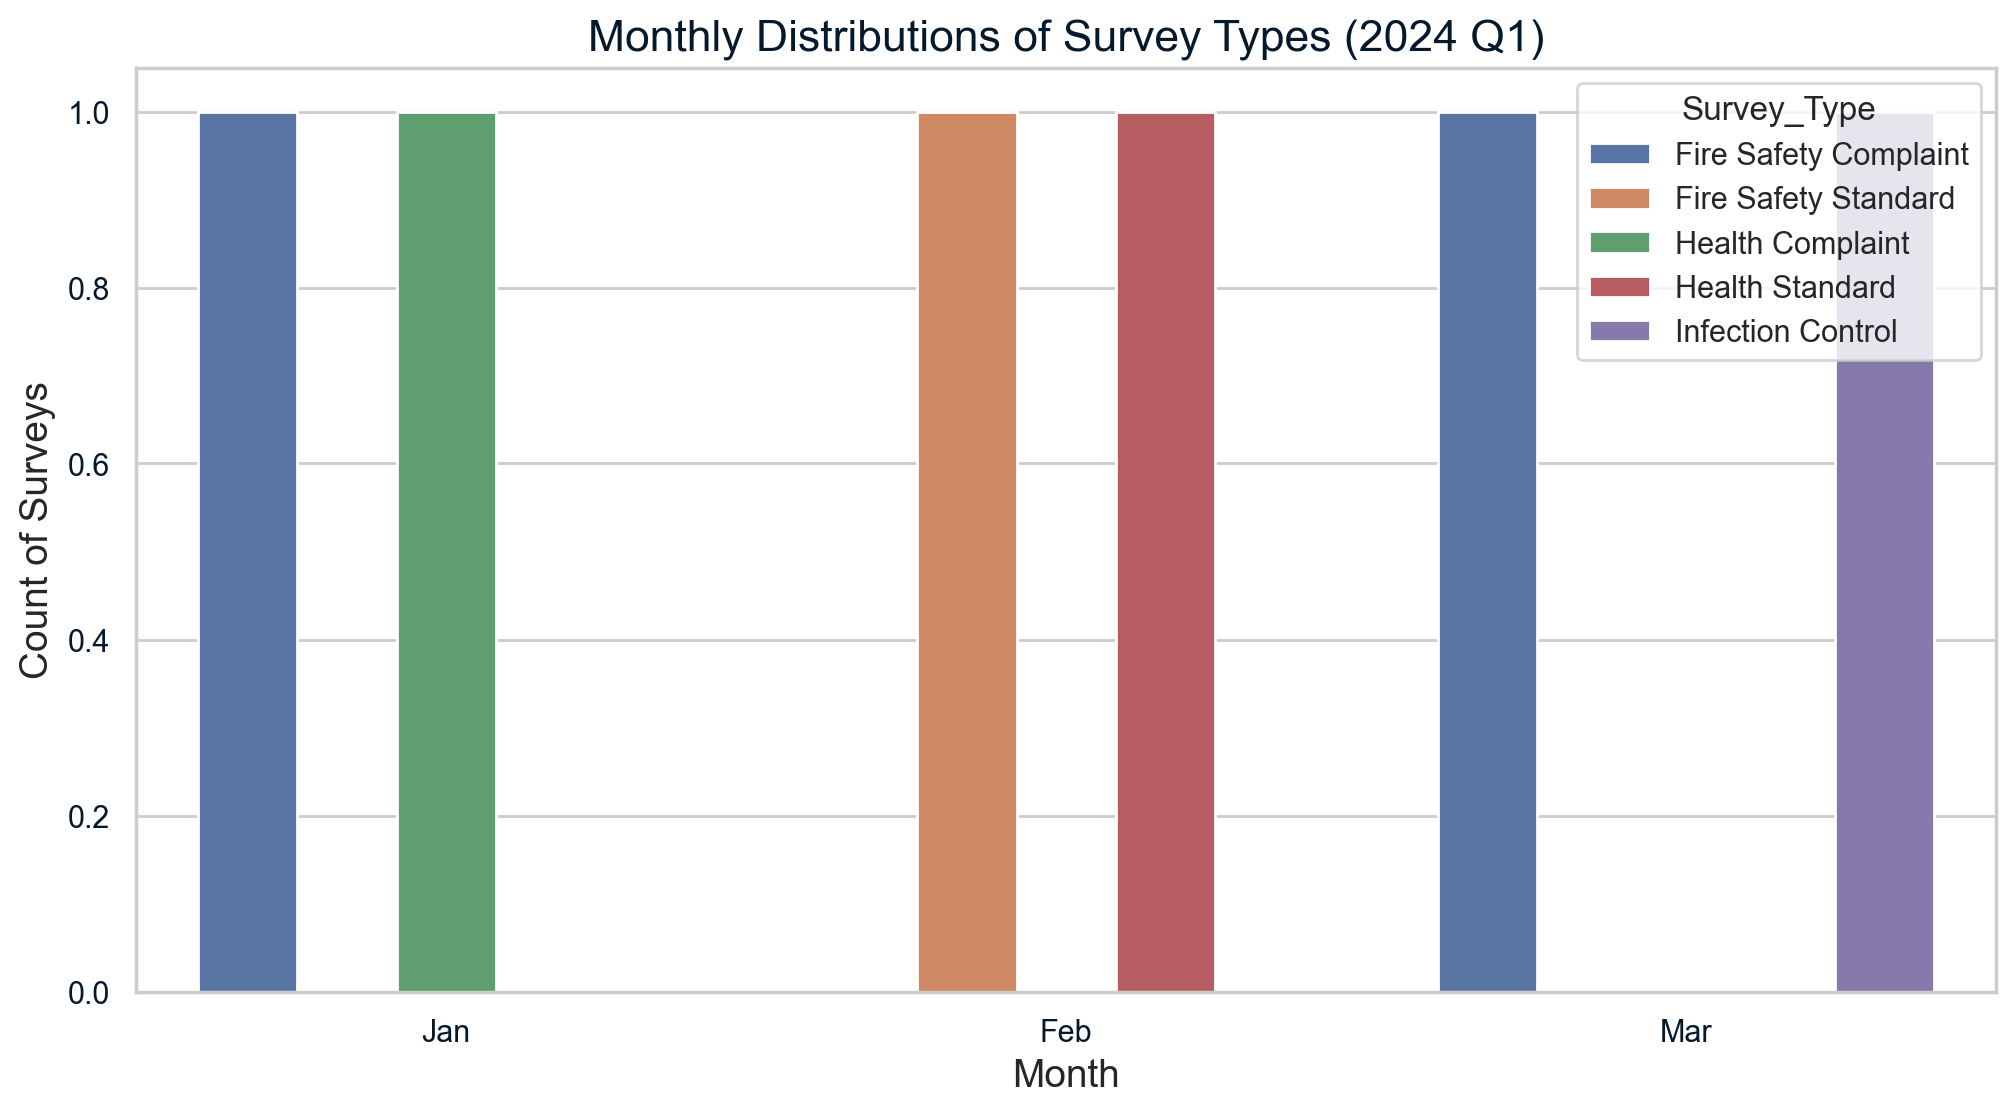

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Ensure the DataFrame is correctly defined and contains the necessary columns
# For demonstration purposes, let's create a sample DataFrame
import pandas as pd

data = {
    'Month': ['Jan', 'Jan', 'Feb', 'Feb', 'Mar', 'Mar'],
    'Survey_Type': ['Fire Safety Complaint', 'Health Complaint', 'Fire Safety Standard', 
                    'Health Standard', 'Infection Control', 'Fire Safety Complaint']
}
df_2024Q1 = pd.DataFrame(data)

# Plot the monthly distributions of survey types
plt.figure(figsize=(12, 6))
sns.countplot(data=df_2024Q1, x='Month', hue='Survey_Type', 
              hue_order=['Fire Safety Complaint', 'Fire Safety Standard', 
                         'Health Complaint', 'Health Standard', 'Infection Control'])

# Add titles and labels
plt.title('Monthly Distributions of Survey Types (2024 Q1)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count of Surveys', fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=['Jan', 'Feb', 'Mar'])

# Show the plot
plt.show()

### Observations:

**Uniform Distribution:**
Each survey type Fire Safety Complaint, Fire Safety Standard, Health Complaint, Health Standard, and Infection Control has an equal count for each month January to March.

This suggests a structured and consistent allocation of surveys over time.

**Balanced Representation:**
All survey types are evenly distributed, indicating no survey type is prioritized over others.

### Insights:

**Operational Consistency:**
The even distribution implies a well-planned system where each survey type receives equal attention monthly.

Such consistency is beneficial for maintaining a balanced focus across different areas of compliance and risk.

**Potential Lack of Prioritization:**
Equal distribution might not reflect actual demand or risk levels for each survey type.

Infection control might require more focus during certain months. An example would be the uptick of respirotry illness in the winter months.

### Recommendations:

**Demand-Driven Adjustments:**
Consider the proactive approach of reviewing the need for dynamic scheduling based on risk or seasonality; more infection control surveys during winter months.

**Evaluate Outcomes:**
Assess whether this equal distribution aligns with organizational goals and consider potential adjustments to improve effectiveness.

**Monitor for Seasonal Trends:**
If risks for certain survey types vary throughout the year, consider implementing a flexible scheduling approach to prioritize high-demand areas.

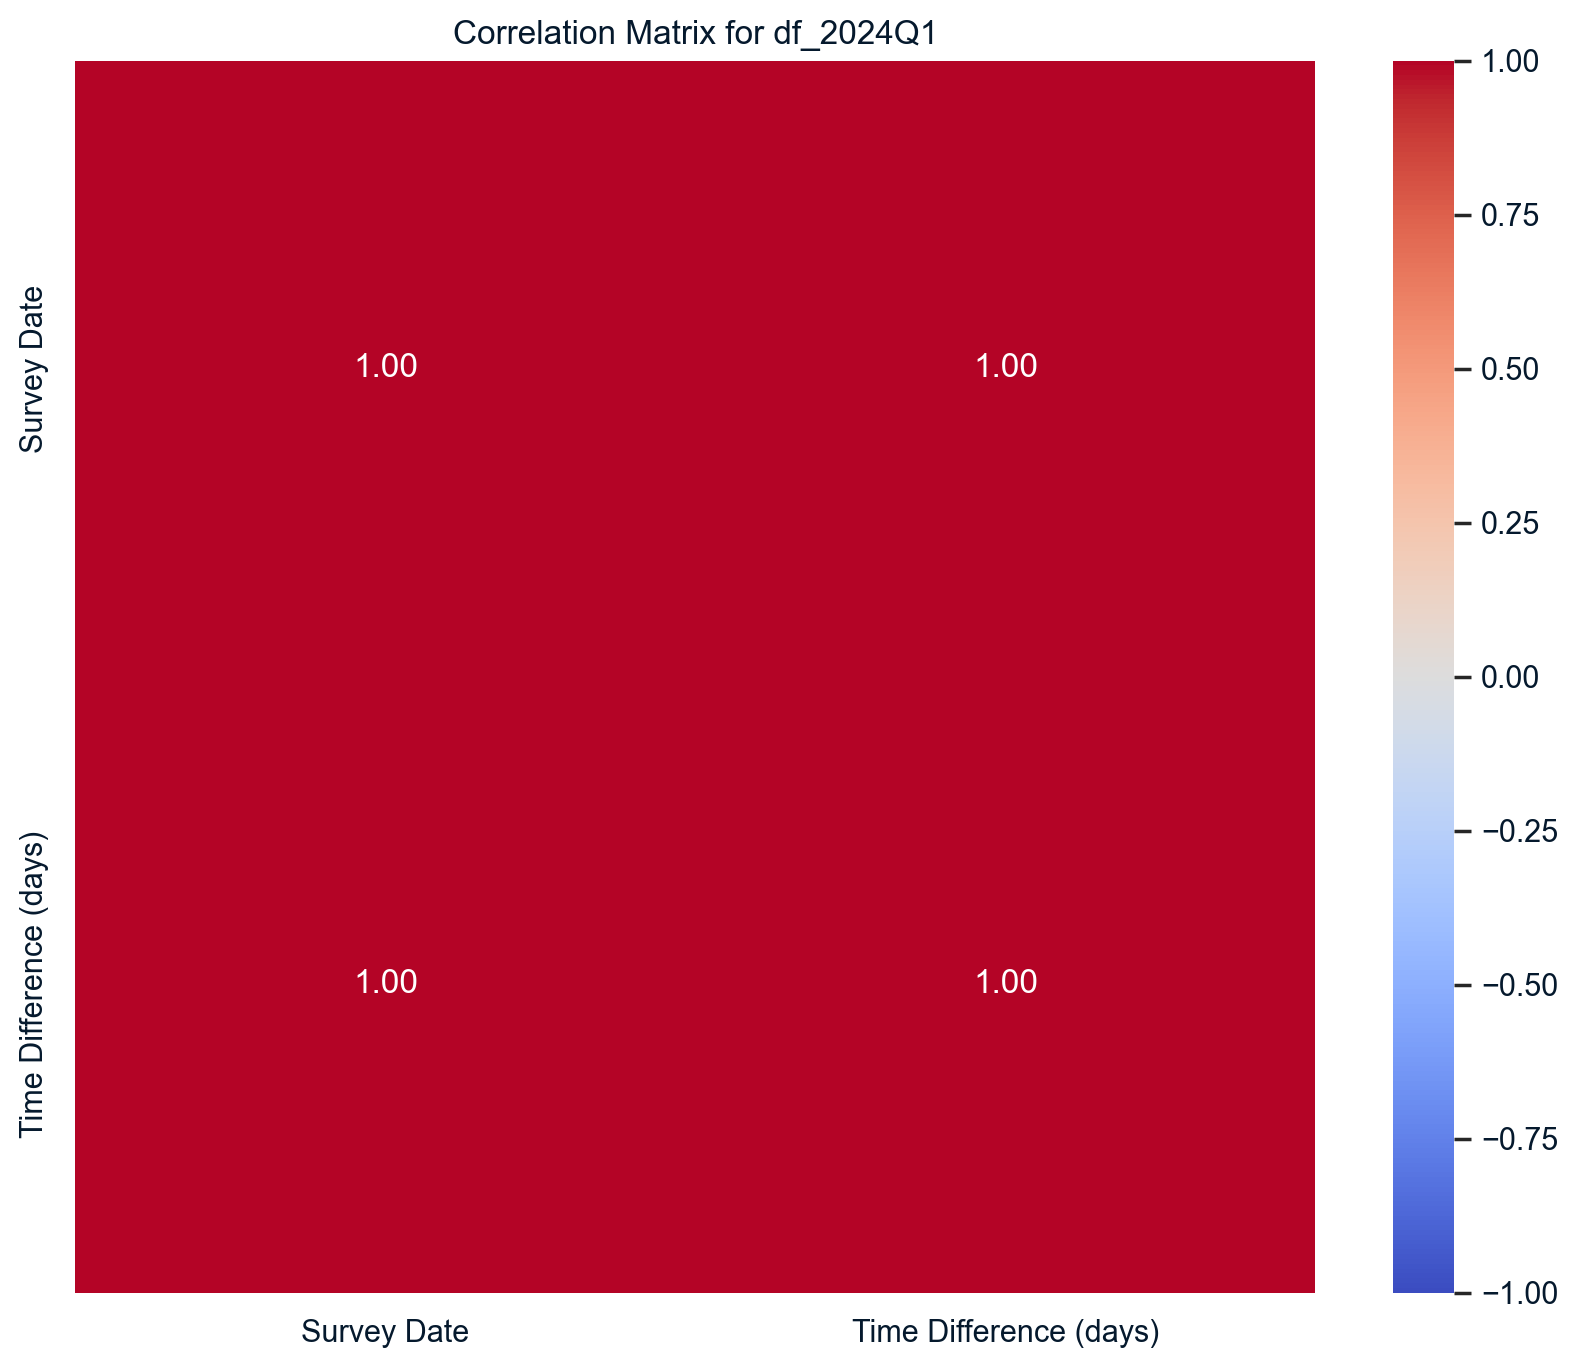

In [28]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the numerical columns in df_2024Q1
correlation_matrix_df_2024Q1 = df_2024Q1.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix_df_2024Q1, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

# Add title and labels
plt.title('Correlation Matrix for df_2024Q1')
plt.show()

### Observations

**Perfect Correlation (1.0):**
The correlation between Survey Date and Time Difference (days) is 1.00, indicating a perfect positive correlation.

This suggests that as time progresses (survey dates increase), the time differences also consistently increase.

### Insights

**Linear Relationship:**
The strong correlation likely reflects a direct, systematic relationship in the data, where Time Difference is structured to grow over survey dates.

This is most likely due to operational or scheduling strategies.

**Consistency:**
The lack of variability in correlation indicates a structured approach, potentially designed to distribute workload evenly or progressively over time.

### Recommendations

**Evaluate Scheduling Practices:**

If the increasing Time Difference (days) is intentional, ensure it aligns with operational goals such as workload management, and priority handling.

**Investigate Data Drivers:**
Confirm if the correlation stems from actual survey practices or an artifact of data structuring.

**Use Predictive Insights:**
Leverage this strong relationship for forecasting future time differences and optimizing survey schedules.


# Final Recommendations 

### Focus on High-Volume Cycles

**Plan for Health Standard Peaks:** Ensure adequate staffing and resources during peak survey cycles.

**Strategic Resource Deployment:** Dynamically allocate resources based on demand trends.

### Maintain Infection Control Monitoring

**Prioritize High-Risk Areas:** Ensure Infection Control surveys address risks in critical areas or facilities.

**Sustain Safety Standards:** Even with fewer surveys, maintain thorough monitoring to prevent lapses.

### Demand-Driven Adjustments

**Dynamic Scheduling:** Adjust survey schedules based on seasonality and risk levels (e.g., prioritize Infection Control during winter).

**Data-Driven Optimization:** Use historical trends to improve future survey coverage and resource alignment

### Optimize Scheduling Systems

**Dynamic Scheduling:** Introduce flexible systems to balance workloads and minimize delays.

**Automation:** Use automated tools to improve scheduling efficiency and adaptability.

### Monitor Linear Trends

**System Efficiency:** Maintain a consistent relationship between survey schedules and processing dates.

**Outlier Analysis:** Investigate deviations from the trend to identify and address inefficiencies.
